### Libraries Installation 

In [1]:
#Import all useful and necessary libraries
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

# Elbow detection
from kneed import KneeLocator

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

 ### Data Importation

In [2]:
# Import customer data into Jupyter Notebook and make a copy for data analysis
df = pd.read_csv(r"C:\Users\Abisola\Downloads\wema_customer_data.csv")
df1 = df.copy()

In [3]:
df["product_Name"].unique()

array(['TIER 3 SAVINGS ACCOUNT'], dtype=object)

In [4]:
df1.head(5)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,yes_count,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,health_transaction_count,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Cluster
0,1900-01-01,NaN,Active,TIER 3 SAVINGS ACCOUNT,38624.54,No,C000172883,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,HNI
1,1900-01-01,NaN,Inactive,TIER 3 SAVINGS ACCOUNT,7522.17,No,C000033338,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Mass Market
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,2.00,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,HNI
3,NaN,NaN,Inactive,TIER 3 SAVINGS ACCOUNT,31672.18,No,C000232882,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Mass Market
4,NaN,NaN,Inactive,TIER 3 SAVINGS ACCOUNT,1774.14,No,C000501331,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Mass Market


### Data Cleaning and Pre-Processing

In [5]:
pd.set_option('display.max_columns', None)
df1.head(2)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,yes_count,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,health_transaction_count,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Cluster
0,1900-01-01,NaN,Active,TIER 3 SAVINGS ACCOUNT,38624.54,No,C000172883,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,HNI
1,1900-01-01,NaN,Inactive,TIER 3 SAVINGS ACCOUNT,7522.17,No,C000033338,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Mass Market


##### Identify columns with null values

In [6]:
df1.isnull().sum()

Date_of_birth                         34
Gender                              1012
Status                                 0
product_Name                           0
clear_Balance                          0
on_alat                                0
customer_id                            0
surgical_procedures                    0
attend_shows                           0
total_transaction_amount               0
total_transaction_count                0
judaism_related                        0
spirituality_related                   0
church_events_programs                 0
night_life_transaction_amount          0
night_life_transaction_count           0
attends_shows                          0
entertainment_transaction_count        0
entertainment_transaction_amount       0
yes_count                              0
religion_transaction_count             0
religion_transaction_amount            0
medical_supplies                       0
herbal_related                         0
health_transacti

##### Make 'Gender' Column only Male and Female 

In [7]:
df1.dtypes

Date_of_birth                        object
Gender                               object
Status                               object
product_Name                         object
clear_Balance                       float64
on_alat                              object
customer_id                          object
surgical_procedures                  object
attend_shows                         object
total_transaction_amount            float64
total_transaction_count             float64
judaism_related                      object
spirituality_related                 object
church_events_programs               object
night_life_transaction_amount       float64
night_life_transaction_count        float64
attends_shows                        object
entertainment_transaction_count     float64
entertainment_transaction_amount    float64
yes_count                           float64
religion_transaction_count          float64
religion_transaction_amount         float64
medical_supplies                

In [8]:
df1['Gender'].unique()

array([nan, 'F', 'M', 'O'], dtype=object)

In [9]:
# See count of each unique value including NaNs
print(df1['Gender'].value_counts(dropna=False))

Gender
M      1161248
F       892521
O         7353
NaN       1012
Name: count, dtype: int64


In [10]:
# View percentage distribution
print(df1['Gender'].value_counts(normalize=True, dropna=False) * 100)

Gender
M     56.31
F     43.28
O      0.36
NaN    0.05
Name: proportion, dtype: float64


In [11]:
# Drop rows with O and NaN 
df1 = df1[~df1['Gender'].isin(['O']) & df1['Gender'].notna()]

In [12]:
# Drop 'Cluster' Column as it is not needed for analysis
df1  = df1.drop(['Cluster'], axis = 1)

In [13]:
df1.head(2)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,yes_count,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,health_transaction_count,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,2.00,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes


##### Change Date of Birth column to DATETIME

In [14]:
df1['Date_of_birth'].dtype

dtype('O')

In [15]:
# Convert to DATETIME 
df1['Date_of_birth'] = pd.to_datetime(df1['Date_of_birth'], errors='coerce')
df1.head(5)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,yes_count,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,health_transaction_count,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,2.00,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
8,1883-01-01,M,Active,TIER 3 SAVINGS ACCOUNT,6274.61,No,R008102053,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
9,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,4042.27,No,R000287425,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
10,NaT,F,Active,TIER 3 SAVINGS ACCOUNT,75505.60,No,R003303371,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes


In [16]:
print(df1['Date_of_birth'].dtype)

datetime64[ns]


##### Find the highest recurring date in the DOB column

In [17]:
dob_counts = df1['Date_of_birth'].value_counts()
most_common_date = dob_counts.idxmax()
most_common_count = dob_counts.max()

print(f"The most frequent Date of Birth is: {most_common_date}, occurring {most_common_count} times.")

The most frequent Date of Birth is: 1980-01-01 00:00:00, occurring 3889 times.


##### Replace the 'NaT' values with the highest occuring date in the Date_of_birth column

In [18]:
df1['Date_of_birth'].fillna(df1['Date_of_birth'].mode().iloc[0], inplace=True)
df1.head()

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,yes_count,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,health_transaction_count,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,2.00,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
8,1883-01-01,M,Active,TIER 3 SAVINGS ACCOUNT,6274.61,No,R008102053,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
9,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,4042.27,No,R000287425,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
10,1980-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,75505.60,No,R003303371,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes


##### Create Age Column using existing 'DOB' column

In [19]:
# Define today's date
today = pd.Timestamp('2025-04-29')
# Calculate age
df1['Age'] = df1['Date_of_birth'].apply(
    lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
)

In [20]:
df1.head(3)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,yes_count,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,health_transaction_count,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Age
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,2.00,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,141
8,1883-01-01,M,Active,TIER 3 SAVINGS ACCOUNT,6274.61,No,R008102053,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,142


##### Remove Duplicates from the Data

In [21]:
duplicate_count = df1['customer_id'].duplicated().sum()
print(f"Total duplicate Customer_IDs: {duplicate_count}")

Total duplicate Customer_IDs: 69664


In [22]:
df1 = df1.drop_duplicates(subset='customer_id', keep='first')
df1.head(3)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,yes_count,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,health_transaction_count,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Age
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,2.00,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,141
8,1883-01-01,M,Active,TIER 3 SAVINGS ACCOUNT,6274.61,No,R008102053,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,0.00,No,No,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,142


#### Drop Unwanted Columns(yes_count and health_transaction_count)

In [23]:
df1.drop(columns=['yes_count', 'health_transaction_count'], inplace=True)
df1.head(3)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Age
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,141
8,1883-01-01,M,Active,TIER 3 SAVINGS ACCOUNT,6274.61,No,R008102053,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,142


In [24]:
df1.dtypes

Date_of_birth                       datetime64[ns]
Gender                                      object
Status                                      object
product_Name                                object
clear_Balance                              float64
on_alat                                     object
customer_id                                 object
surgical_procedures                         object
attend_shows                                object
total_transaction_amount                   float64
total_transaction_count                    float64
judaism_related                             object
spirituality_related                        object
church_events_programs                      object
night_life_transaction_amount              float64
night_life_transaction_count               float64
attends_shows                               object
entertainment_transaction_count            float64
entertainment_transaction_amount           float64
religion_transaction_count     

### Data Exploration

In [25]:
df1.describe()

,Date_of_birth,clear_Balance,total_transaction_amount,total_transaction_count,night_life_transaction_amount,night_life_transaction_count,entertainment_transaction_count,entertainment_transaction_amount,religion_transaction_count,religion_transaction_amount,Age
count,1984105,1984105.00,1984105.00,1984105.00,1984105.00,1984105.00,1984105.00,1984105.00,1984105.00,1984105.00,1984105.00
mean,1986-11-23 23:19:24.903067008,147999.96,253802.13,14.87,3626.89,0.09,0.06,2442.00,0.34,6062.03,37.94
min,1694-02-02 00:00:00,-15916.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-25.00
25%,1978-11-18 00:00:00,86.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27.00
50%,1989-08-08 00:00:00,513.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.00
75%,1997-09-11 00:00:00,9017.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,46.00
max,2049-12-19 00:00:00,1555735500.39,241075206.12,2657.00,266500000.00,272.00,373.00,182920000.00,667.00,98309370.00,331.00
std,NaN,2321090.26,2046020.74,63.82,289488.90,1.29,0.95,230796.86,3.99,202319.44,13.70


In [26]:
# Number of rows and columns
df1.shape

(1984105, 55)

#### Create Duplicate of Cleaned Data

In [27]:
df2 = df1.copy()
df2.head()

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Age
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,141
8,1883-01-01,M,Active,TIER 3 SAVINGS ACCOUNT,6274.61,No,R008102053,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,142
9,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,4042.27,No,R000287425,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125
10,1980-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,75505.60,No,R003303371,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,45


#### Drop columns that are not needed for scaling

In [28]:
df2.columns

Index(['Date_of_birth', 'Gender', 'Status', 'product_Name', 'clear_Balance',
       'on_alat', 'customer_id', 'surgical_procedures', 'attend_shows',
       'total_transaction_amount', 'total_transaction_count',
       'judaism_related', 'spirituality_related', 'church_events_programs',
       'night_life_transaction_amount', 'night_life_transaction_count',
       'attends_shows', 'entertainment_transaction_count',
       'entertainment_transaction_amount', 'religion_transaction_count',
       'religion_transaction_amount', 'medical_supplies', 'herbal_related',
       'goes_to_club', 'alcohol_purchase', 'dining_and_nightlife',
       'luxury_expenditure', 'gambling_or_casino',
       'membership_or_subscription', 'entertainment_events', 'club_type',
       'has_health_condition', 'hospital_visit', 'pharmacy_purchase',
       'lab_tests', 'health_insurance', 'specialty_involved',
       'fitness_related', 'rehabilitation', 'pays_for_streaming',
       'pays_for_gaming', 'pays_for_music',

In [29]:
df2 = df2[['total_transaction_amount', 'total_transaction_count',
 'night_life_transaction_amount', 'night_life_transaction_count', 'entertainment_transaction_count',
       'entertainment_transaction_amount', 'religion_transaction_count',
       'religion_transaction_amount']]

In [30]:
df2.dtypes

total_transaction_amount            float64
total_transaction_count             float64
night_life_transaction_amount       float64
night_life_transaction_count        float64
entertainment_transaction_count     float64
entertainment_transaction_amount    float64
religion_transaction_count          float64
religion_transaction_amount         float64
dtype: object

#### Change Categorical columns to binary numbers

In [31]:
df2.head(5)

,total_transaction_amount,total_transaction_count,night_life_transaction_amount,night_life_transaction_count,entertainment_transaction_count,entertainment_transaction_amount,religion_transaction_count,religion_transaction_amount
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Feature Scaling (MinMaxscaler)

In [32]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df2_scaled = scaler.fit_transform(df2)

# Convert the result back to a DataFrame to keep column names
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)
print('Minmax scaling of df2 complete!')

Minmax scaling of df2 complete!


### Model Building

#### KMeans Clustering

In [33]:
# Range of cluster numbers to test
k_values = range(1, 11)
inertia_values = []

# Compute inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state= 580)
    kmeans.fit(df2_scaled)
    inertia_values.append(kmeans.inertia_)
    
print("K-Means clustering complete!")

K-Means clustering complete!


#### Elbow Plot Graph

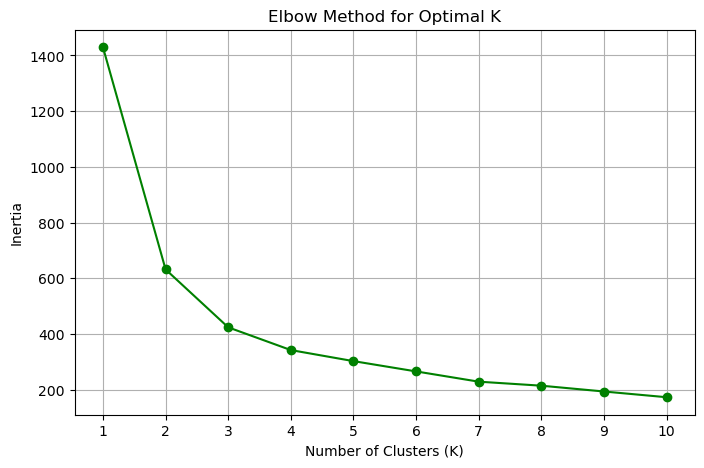

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Optimal K Value

In [35]:
from kneed import KneeLocator

knee_locator = KneeLocator(k_values, inertia_values, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow
print(f"Optimal K: {optimal_k}")

Optimal K: 3


#### Fit and add Cluster Column to the df1 dataframe

In [36]:
# Fit KMeans using the scaled data
kmeans = KMeans(n_clusters= optimal_k, random_state=580)
cluster_labels = kmeans.fit_predict(df2_scaled)

# Add the cluster labels to your original dataframe
df1['Cluster'] = cluster_labels

##### Cluster and the value counts in each

In [37]:
df1['Cluster'].value_counts()

Cluster
0    1871105
1      97360
2      15640
Name: count, dtype: int64

#### Use PCA and Plot

In [38]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization (or more, depending on explained variance)
pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2_scaled)

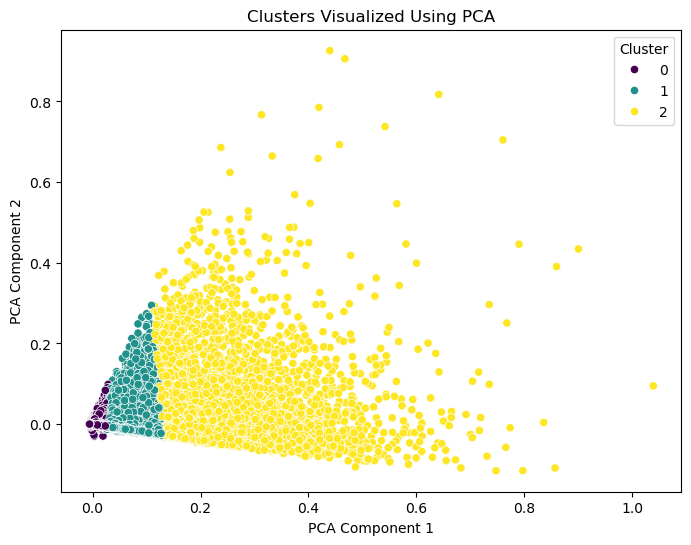

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1], hue=df1['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized Using PCA')
plt.legend(title="Cluster")
plt.show()

#### Summary Statistics of the Clusters

In [40]:
df1.groupby('Cluster').mean(numeric_only=True)

,clear_Balance,total_transaction_amount,total_transaction_count,night_life_transaction_amount,night_life_transaction_count,entertainment_transaction_count,entertainment_transaction_amount,religion_transaction_count,religion_transaction_amount,Age
Cluster,,,,,,,,,,
0,144818.17,35091.43,2.35,3335.48,0.08,0.05,2272.64,0.31,5502.02,37.74
1,182472.62,2635072.21,173.84,6682.14,0.21,0.13,4566.51,0.93,15251.01,40.99
2,314061.47,11595889.12,522.09,19470.10,0.46,0.22,9478.46,1.07,15857.43,42.12


#### Create dataframes for each of the clusters

In [41]:
Cluster_0 = df1[df1["Cluster"] == 0]
Cluster_1 = df1[df1["Cluster"] == 1]
Cluster_2 = df1[df1["Cluster"] == 2]

In [42]:
df1['clusters'] = df1['Cluster'].replace({0: 'Mass Market', 1: 'Progressive', 2: 'Prestige'})
df1

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Age,Cluster,clusters
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125,0,Mass Market
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,141,0,Mass Market
8,1883-01-01,M,Active,TIER 3 SAVINGS ACCOUNT,6274.61,No,R008102053,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,142,0,Mass Market
9,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,4042.27,No,R000287425,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125,0,Mass Market
10,1980-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,75505.60,No,R003303371,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,45,0,Mass Market
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062127,2013-03-31,M,Inactive,TIER 3 SAVINGS ACCOUNT,0.16,No,R001670960,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,12,0,Mass Market
2062128,2015-08-14,F,Active,TIER 3 SAVINGS ACCOUNT,0.00,No,R001629735,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,9,0,Mass Market
2062129,2016-07-12,F,Active,TIER 3 SAVINGS ACCOUNT,0.00,No,R003712270,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,8,0,Mass Market
2062130,2022-01-06,M,Active,TIER 3 SAVINGS ACCOUNT,0.00,Yes,R005320222,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,1.00,145200.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,3,0,Mass Market


In [43]:
print(f"Mass Market shape is: {Cluster_0.shape}")
print(f"Progressive shape is: {Cluster_1.shape}")
print(f"Prestige shape is: {Cluster_2.shape}")

Mass Market shape is: (1871105, 56)
Progressive shape is: (97360, 56)
Prestige shape is: (15640, 56)


In [44]:
Mass_Market = df1[df1['clusters'] == 'Mass Market']
Progressive = df1[df1['clusters'] == 'Progressive']
Prestige = df1[df1['clusters'] == 'Prestige']

Mass_Market.to_csv("Mass_Market.csv", index=False)
Progressive.to_csv("Progressive.csv", index=False)
Prestige.to_csv("Prestige.csv", index=False)


In [45]:
df1.to_csv("df1_with_clusters.csv", index=False)

## Exploratory Data Analysis

#### Cluster Analysis by Gender

In [46]:
pd.crosstab(df1['Cluster'], df1['Gender'], normalize='index')  * 100

Gender,F,M
Cluster,,
0,43.72,56.28
1,46.13,53.87
2,24.92,75.08


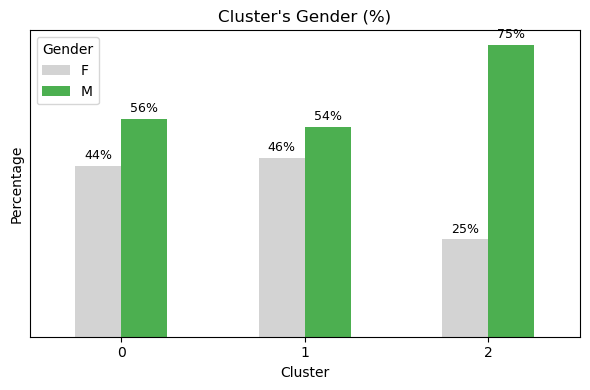

In [47]:
status_dist = pd.crosstab(df1['Cluster'], df1['Gender'], normalize='index') * 100

# Round percentages to nearest whole number
status_dist = status_dist.round(0)

# Soft colors (lavender and peach)
soft_lavender =  '#D3D3D3'  # pastel lavender
soft_peach = '#4CAF50' # pastel peach

# Plot setup with smaller dimensions
ax = status_dist.plot(kind='bar', stacked=False, figsize=(6, 4), color=[soft_lavender, soft_peach])
plt.title("Cluster's Gender (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove y-axis labels
plt.yticks([])
# Add percentage labels (no decimal places)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,  # slightly above the bar
                f'{int(height)}%',  # No decimal points
                ha='center',
                va='bottom',
                fontsize=9
            )
plt.tight_layout()
plt.show()

#### Cluster by Status(of Account)

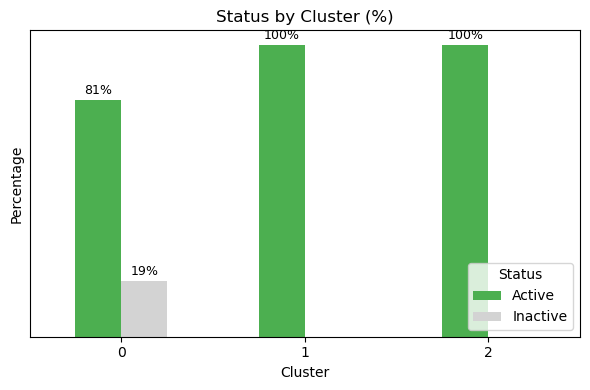

In [48]:
# Crosstab with percentages for Status instead of Gender
status_dist = pd.crosstab(df1['Cluster'], df1['Status'], normalize='index') * 100

# Round percentages to nearest whole number
status_dist = status_dist.round(0)
# Crosstab with percentages for Status instead of Gender
status_dist = pd.crosstab(df1['Cluster'], df1['Status'], normalize='index') * 100

# Round percentages to nearest whole number
status_dist = status_dist.round(0)

# Soft colors (lavender and peach)
soft_lavender = '#4CAF50'  # pastel lavender
soft_peach = '#D3D3D3'   # pastel peach

# Plot setup with smaller dimensions
ax = status_dist.plot(kind='bar', stacked=False, figsize=(6, 4), color=[soft_lavender, soft_peach])
plt.title("Status by Cluster (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove y-axis labels
plt.yticks([])
# Add percentage labels (no decimal places)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,  # slightly above the bar
                f'{int(height)}%',  # No decimal points
                ha='center',
                va='bottom',
                fontsize=9
            )
plt.tight_layout()
plt.show()

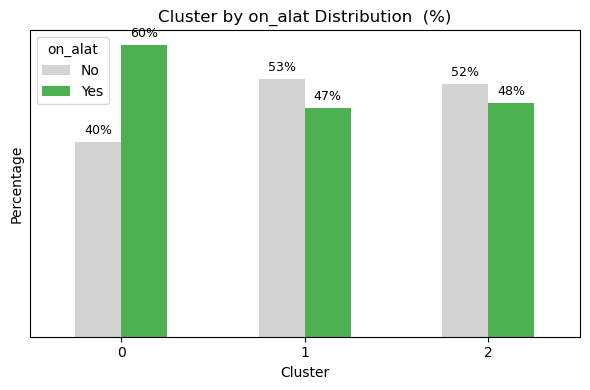

In [49]:

# Crosstab with percentages for on_alat (Yes/No)
alat_dist = pd.crosstab(df1['Cluster'], df1['on_alat'], normalize='index') * 100

# Round percentages to nearest whole number
alat_dist = alat_dist.round(0)

# Soft colors (lavender and peach)
soft_lavender = '#D3D3D3'  # pastel lavender (for Yes)
soft_peach = '#4CAF50'  # pastel peach (for No)

# Plot setup for column chart with smaller dimensions
ax = alat_dist.plot(kind='bar', stacked=False, figsize=(6, 4), color=[soft_lavender, soft_peach])

# Title and labels
plt.title("Cluster by on_alat Distribution  (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title='on_alat')

# Add percentage labels above each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,  # slightly above the bar
                f'{int(height)}%',  # No decimal points
                ha='center',
                va='bottom',
                fontsize=9
            )

# Remove y-axis labels
plt.yticks([])

# Show plot
plt.tight_layout()
plt.show()


### EDA: Mean Age for each Cluster

In [50]:
# Calculate the mean age for each cluster
mean_ages = df1.groupby('Cluster')['Age'].mean()

# Print the mean age for each cluster
for cluster, mean_age in mean_ages.items():
    print(f"The Cluster {cluster} mean age is {mean_age:.1f}")

The Cluster 0 mean age is 37.7
The Cluster 1 mean age is 41.0
The Cluster 2 mean age is 42.1


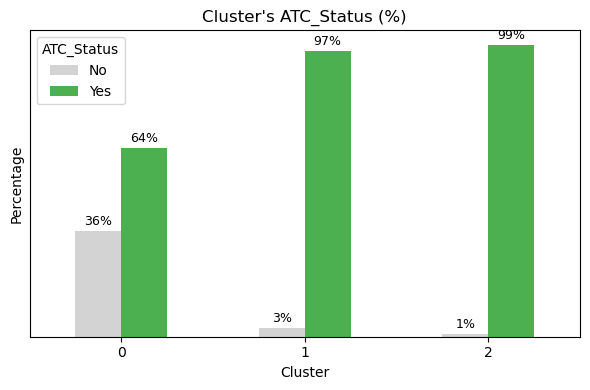

In [51]:
# Crosstab with percentages for ATC_Status
atc_status_dist = pd.crosstab(df1['Cluster'], df1['ATC_Status'], normalize='index') * 100

# Round percentages to nearest whole number
atc_status_dist = atc_status_dist.round(0)

# New colors for the bars (pastel teal and peachy orange)
soft_teal = '#D3D3D3'  # pastel teal
soft_orange = '#4CAF50'  # pastel peachy orange

# Plot setup with smaller dimensions
ax = atc_status_dist.plot(kind='bar', stacked=False, figsize=(6, 4), color=[soft_teal, soft_orange])

# Title and labels
plt.title("Cluster's ATC_Status (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='ATC_Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove y-axis labels
plt.yticks([])

# Add percentage labels (no decimal places)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,  # slightly above the bar
                f'{int(height)}%',  # No decimal points
                ha='center',
                va='bottom',
                fontsize=9
            )

# Layout adjustment
plt.tight_layout()
plt.show()

In [52]:
df1.head(3)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Age,Cluster,clusters
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,18476.76,Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125,0,Mass Market
6,1883-07-11,M,Active,TIER 3 SAVINGS ACCOUNT,170271.89,Yes,R007667320,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,141,0,Mass Market
8,1883-01-01,M,Active,TIER 3 SAVINGS ACCOUNT,6274.61,No,R008102053,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,142,0,Mass Market


In [ ]:
print(f"Cluster 0 shape is: {Cluster_0.shape}")
print(f"Cluster 1 shape is: {Cluster_1.shape}")
print(f"Cluster 2 shape is: {Cluster_2.shape}")

### Exploratory Data Analaysis(EDA) on Numerical Columns

#### EDA: Total Transaction Amount

In [54]:
# Summary statistics by cluster for 'total_transaction_amount'
summary = df1.groupby('Cluster')['total_transaction_amount'].describe()
# Drop the percentile rows
summary = summary.drop(['25%', '50%', '75%'], axis=1)
summary = summary.T  # Transpose for readability

# Format float values for cleaner display
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)

Cluster             0             1              2
count    1,871,105.00     97,360.00      15,640.00
mean        35,091.43  2,635,072.21  11,595,889.12
std        279,817.03  3,880,057.27  16,072,755.17
min              0.00      8,342.33           5.88
max     24,948,800.00 75,277,501.74 241,075,206.12


#### EDA: Total Transaction Count

In [55]:
# Summary statistics by cluster for 'total_transaction_count'
summary = df1.groupby('Cluster')['total_transaction_count'].describe()
# Drop the percentile rows
summary = summary.drop(['25%', '50%', '75%'], axis=1)
summary = summary.T  # Transpose for readability

# Format float values for cleaner display
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)

Cluster            0         1         2
count   1,871,105.00 97,360.00 15,640.00
mean            2.35    173.84    522.09
std            11.36     68.48    196.97
min             0.00     49.00    122.00
max            90.00    368.00  2,657.00


#### EDA: Nightlife Transaction Amount

In [56]:
# Summary statistics by cluster for 'night_life_transaction_amount'
summary = df1.groupby('Cluster')['night_life_transaction_amount'].describe()
# Drop the percentile rows
summary = summary.drop(['25%', '50%', '75%'], axis=1)
summary = summary.T  # Transpose to make clusters the columns

# Neat float formatting
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)

Cluster              0             1             2
count     1,871,105.00     97,360.00     15,640.00
mean          3,335.48      6,682.14     19,470.10
std         293,398.70    178,595.38    366,027.01
min               0.00          0.00          0.00
max     266,500,000.00 41,126,300.00 23,312,100.00


#### EDA: Nightlife Transaction Count

In [57]:
# Summary statistics by cluster for 'night_life_transaction_count'
summary = df1.groupby('Cluster')['night_life_transaction_count'].describe()
# Drop the percentile rows
summary = summary.drop(['25%', '50%', '75%'], axis=1)
summary = summary.T  # Transpose for better readability

# Format float values for cleaner display
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)

Cluster            0         1         2
count   1,871,105.00 97,360.00 15,640.00
mean            0.08      0.21      0.46
std             1.22      1.95      2.97
min             0.00      0.00      0.00
max           272.00    160.00    128.00


#### EDA: Religious Transaction Amount

In [58]:
# Summary statistics by cluster for 'religion_transaction_amount'
summary = df1.groupby('Cluster')['religion_transaction_amount'].describe()

# Drop the percentile rows
summary = summary.drop(['25%', '50%', '75%'], axis=1)
# Transpose the summary for better readability
summary = summary.T

# Format float values for cleaner display
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)

Cluster             0             1             2
count    1,871,105.00     97,360.00     15,640.00
mean         5,502.02     15,251.01     15,857.43
std        198,671.40    262,164.41    205,547.50
min              0.00          0.00          0.00
max     98,309,370.00 39,106,104.38 16,165,147.00


#### EDA: Religious Transaction Count

In [59]:
# Summary statistics by cluster for 'religion_transaction_count'
summary = df1.groupby('Cluster')['religion_transaction_count'].describe()

# Drop the percentile rows
summary = summary.drop(['25%', '50%', '75%'], axis=1)
# Transpose the summary for better readability
summary = summary.T

# Format float values for cleaner display
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)


Cluster            0         1         2
count   1,871,105.00 97,360.00 15,640.00
mean            0.31      0.93      1.07
std             3.69      6.95      9.09
min             0.00      0.00      0.00
max           667.00    362.00    530.00


#### EDA: Entertainment Transaction Amount

In [ ]:
# Summary statistics by cluster for 'entertainment_transaction_amount'
summary = df1.groupby('Cluster')['entertainment_transaction_amount'].describe()

# Drop the percentile rows
summary = summary.drop(['25%', '50%', '75%'], axis=1)

# Transpose for better readability
summary = summary.T

# Format float values for cleaner display
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)

#### EDA: Entertainment Transaction Count

In [ ]:
# Summary statistics by cluster for 'entertainment_transaction_count'
summary = df1.groupby('Cluster')['entertainment_transaction_count'].describe()

# Drop the percentile rows
summary = summary.drop(['25%', '50%', '75%'], axis=1)

# Transpose for better readability
summary = summary.T

# Format float values for cleaner display
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)

#### EDA: Clear Balance

In [60]:
# Summary statistics (count and mean only) by cluster for 'clear_Balance'
summary = df1.groupby('Cluster')['clear_Balance'].agg(['count', 'mean'])

# Transpose for better readability
summary = summary.T

# Format float values for cleaner display
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary)

Cluster            0          1          2
count   1,871,105.00  97,360.00  15,640.00
mean      144,818.17 182,472.62 314,061.47


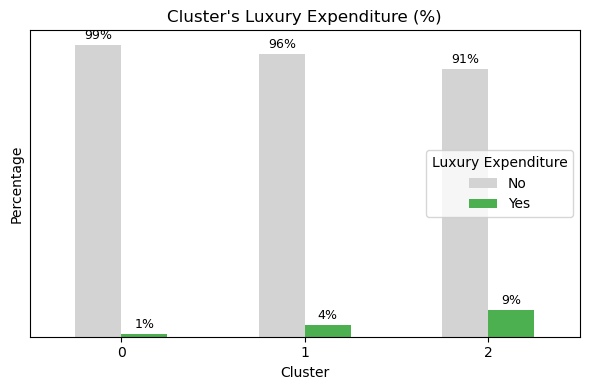

In [61]:
luxury_exp_dist = pd.crosstab(df1['Cluster'], df1['luxury_expenditure'], normalize='index') * 100
luxury_exp_dist = luxury_exp_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = luxury_exp_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Luxury Expenditure (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Luxury Expenditure')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [62]:
df1.head(1)

,Date_of_birth,Gender,Status,product_Name,clear_Balance,on_alat,customer_id,surgical_procedures,attend_shows,total_transaction_amount,total_transaction_count,judaism_related,spirituality_related,church_events_programs,night_life_transaction_amount,night_life_transaction_count,attends_shows,entertainment_transaction_count,entertainment_transaction_amount,religion_transaction_count,religion_transaction_amount,medical_supplies,herbal_related,goes_to_club,alcohol_purchase,dining_and_nightlife,luxury_expenditure,gambling_or_casino,membership_or_subscription,entertainment_events,club_type,has_health_condition,hospital_visit,pharmacy_purchase,lab_tests,health_insurance,specialty_involved,fitness_related,rehabilitation,pays_for_streaming,pays_for_gaming,pays_for_music,pays_for_events,goes_to_cinema,pays_for_sports/fitness,goes_to_amusement_parks,pays_for_travel/leisure,pays_for_books,is_christian,pays_tithe,is_muslim,pays_offering,financial_support_religion,ATC_Status,Age,Cluster,clusters
2,1900-01-01,F,Active,TIER 3 SAVINGS ACCOUNT,"18,476.76",Yes,R000882981,No,No,0.00,0.00,No,No,No,0.00,0.00,No,0.00,0.00,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,125,0,Mass Market


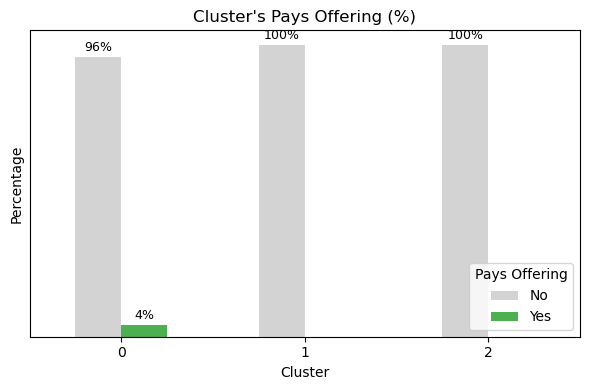

In [63]:
pays_offering_dist = pd.crosstab(df1['Cluster'], df1['pays_offering'], normalize='index') * 100
pays_offering_dist = pays_offering_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = pays_offering_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Pays Offering (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Pays Offering')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


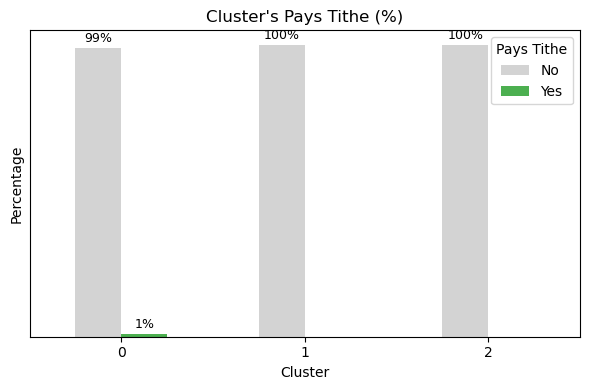

In [64]:
pays_tithe_dist = pd.crosstab(df1['Cluster'], df1['pays_tithe'], normalize='index') * 100
pays_tithe_dist = pays_tithe_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = pays_tithe_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Pays Tithe (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Pays Tithe')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
is_christian_dist = pd.crosstab(df1['Cluster'], df1['is_christian'], normalize='index') * 100
is_christian_dist = is_christian_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = is_christian_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Is Christian (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Is Christian')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



In [ ]:
is_muslim_dist = pd.crosstab(df1['Cluster'], df1['is_muslim'], normalize='index') * 100
is_muslim_dist = is_muslim_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = is_muslim_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Is Muslim (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Is Muslim')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
financial_support_religion_dist = pd.crosstab(df1['Cluster'], df1['financial_support_religion'], normalize='index') * 100
financial_support_religion_dist = financial_support_religion_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = financial_support_religion_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Financial Support Religion (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Financial Support Religion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


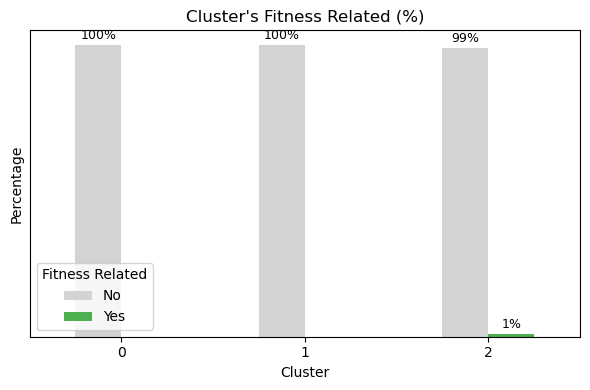

In [65]:
fitness_related_dist = pd.crosstab(df1['Cluster'], df1['fitness_related'], normalize='index') * 100
fitness_related_dist = fitness_related_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = fitness_related_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Fitness Related (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Fitness Related')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
health_insurance_dist = pd.crosstab(df1['Cluster'], df1['health_insurance'], normalize='index') * 100
health_insurance_dist = health_insurance_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = health_insurance_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Health Insurance (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Health Insurance')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
df1.head(2)


In [ ]:
spirituality_related_dist = pd.crosstab(df1['Cluster'], df1['spirituality_related'], normalize='index') * 100
spirituality_related_dist = spirituality_related_dist.round(0)

# Define intuitive color mapping: 'No' = gray, 'Yes' = green
colors = ['#D3D3D3', '#4CAF50']  # Adjust if your columns are in a different order

ax = spirituality_related_dist.plot(kind='bar', figsize=(6, 4), color=colors)

plt.title("Cluster's Spirituality-Related (%)")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.legend(title='Spirituality-Related')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks([])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
